**Imports**

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import more_itertools as mit
from datetime import datetime, timedelta,date
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

In [3]:
df_data = pd.read_csv('Telecom_customer churn.csv')
df_data.head(10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.00,0.00,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.10,9.10,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.00,0.00,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.00,0.00,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,82.2750,1312.25,75.000,1.2375,0.00,0.00,0.00,0.0,0.0,156.75,...,0.0,U,U,U,U,U,U,Y,458.0,1000006
6,17.1450,0.00,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,N,U,U,U,U,U,Y,852.0,1000007
7,38.0525,682.50,52.490,0.2475,0.00,0.00,0.00,0.0,0.0,147.50,...,1.0,S,U,U,U,U,U,Y,231.0,1000008
8,97.3375,1039.00,50.000,4.9500,419.50,41.95,41.95,0.0,0.0,198.00,...,0.0,F,U,U,U,U,U,N,700.0,1000009
9,31.6625,25.50,29.990,0.2475,0.00,0.00,0.00,0.0,0.0,59.50,...,1.0,N,U,U,U,U,U,Y,601.0,1000010


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

**Data Visualization**

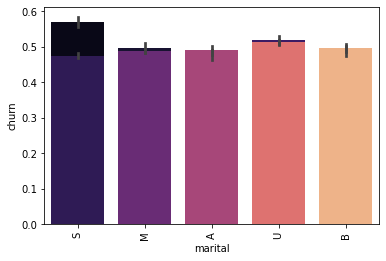

In [58]:
plt.xticks(rotation=90)
sns.barplot(x='area',y='churn',data=df_data, estimator=np.mean,palette="magma")

In [88]:
df_plot = df_data.groupby('avgrev').churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['avgrev'],
        y=df_plot['churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Monthy Revenue"},
        title='Monthy Revenue VS Churn Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

**Data Preprocessing**

In [89]:
df_data['churn'].head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [64]:
altered_df = pd.get_dummies(df_data) # Convert categorical columns to numerical

# Creating X and y, X will be feature set and y is the label - LTV
X = altered_df.drop(['churn'],axis=1)
y = altered_df['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56) #split training and test sets

In [73]:
print(len(df_data.columns))
print(len(altered_df.columns))

100
232


In [69]:
altered_df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,1,0,1,0,1,0,1,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,1,0,1,0,1,0,1,0,0,1
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0,1,1,0,1,0,1,0,0,1
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,1,0,1,0,1,0,1,0,0,1
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,1,0,1,0,1,0,1,0,0,1


In [100]:
altered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 232 entries, rev_Mean to creditcd_Y
dtypes: float64(69), int64(10), uint8(153)
memory usage: 74.9 MB


**Classification**

In [91]:
#building the model & printing the score
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.66
Accuracy of XGB classifier on test set: 0.64


In [92]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63      2520
           1       0.63      0.66      0.64      2480

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



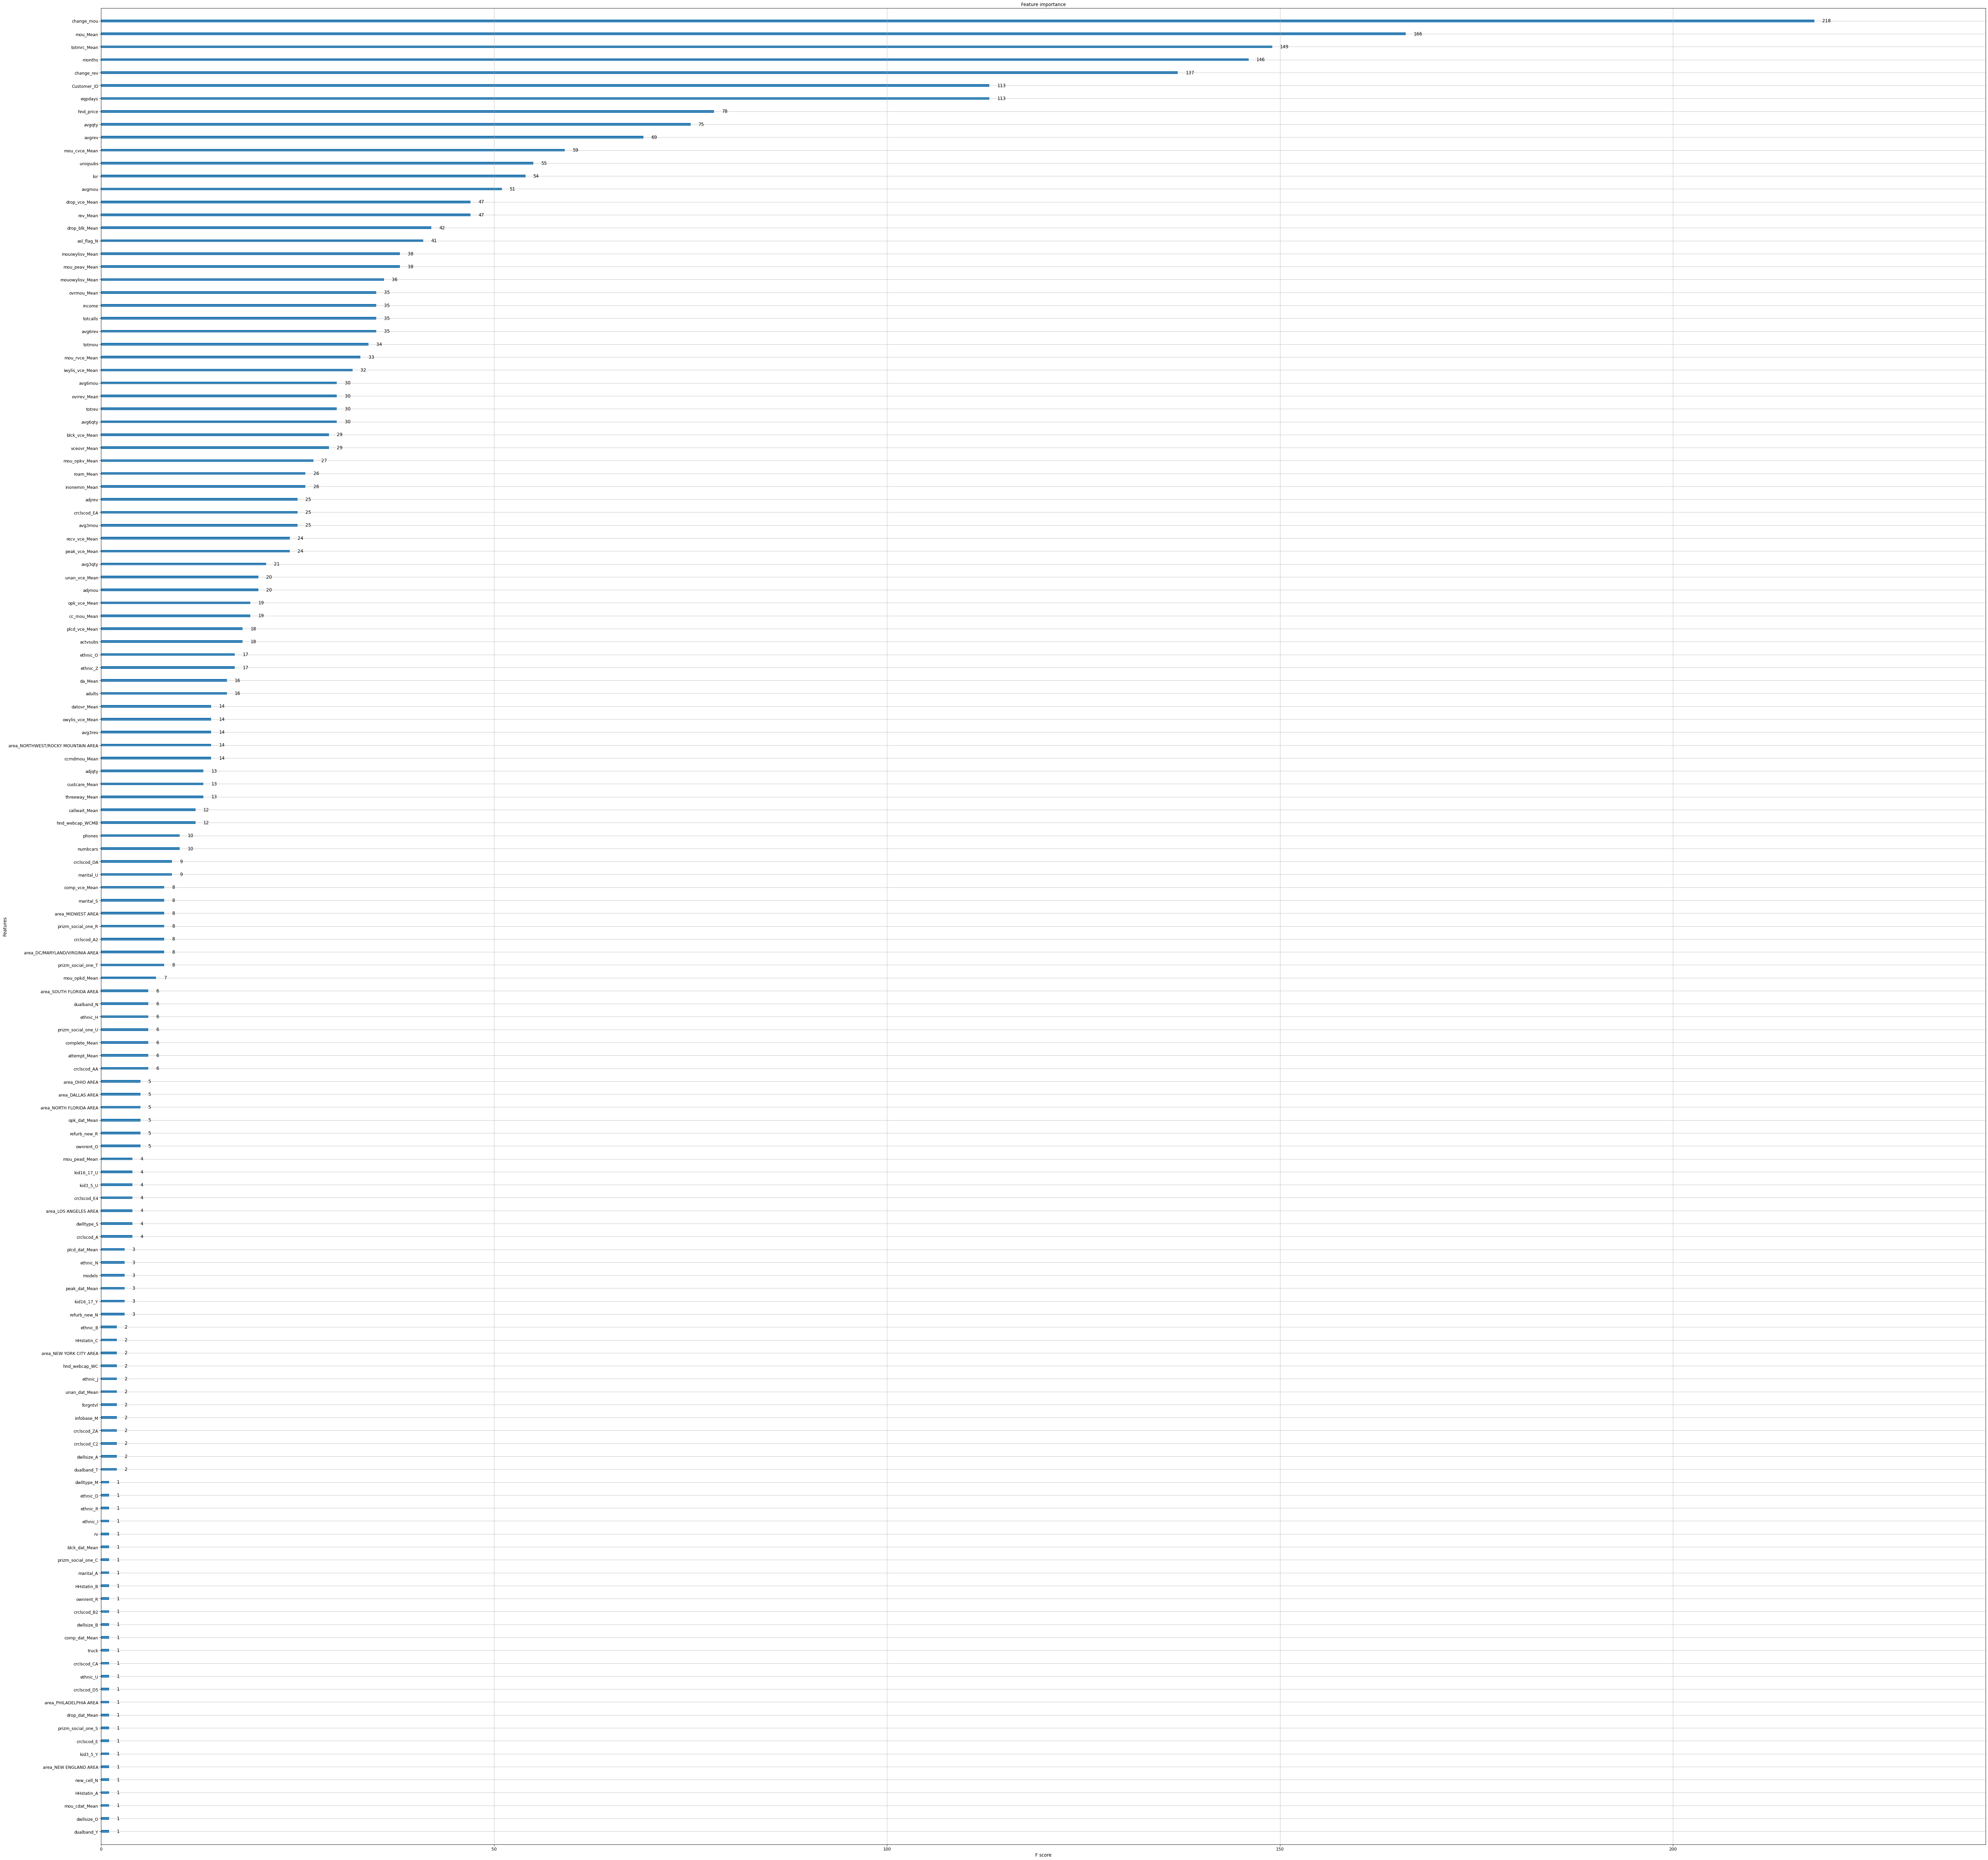

In [95]:

fig, ax = plt.subplots(figsize=(100,100))
plot_importance(xgb_model, ax=ax)